In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 


### overview of train

In [14]:
train=pd.read_csv("train.csv")

In [15]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,NaN,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
train.shape

(2952, 70)

In [17]:
train.describe(include='all')

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
count,2952,2952.000000,2952,2927,2649,2952.000000,2952.000000,2550.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
unique,2952,NaN,2,12,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TCBA-B8-0x12c6,NaN,Male,75-79,White,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1668,451,2256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.036924,NaN,NaN,NaN,2010.925136,80940.815718,2016.694118,14.992209,5.195799,...,0.026762,0.026423,0.026084,0.023713,0.019986,0.020325,0.019648,0.019986,0.024729,0.699526
std,NaN,24.840630,NaN,NaN,NaN,1.402237,1357.411378,1.745409,7.926741,2.459212,...,0.161413,0.160416,0.159412,0.152178,0.139977,0.141134,0.138810,0.139977,0.155324,0.458542
min,NaN,1.000000,NaN,NaN,NaN,2009.000000,80003.000000,2013.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,2010.000000,80103.000000,2015.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,NaN,NaN,2011.000000,80463.000000,2017.000000,15.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,3.000000,NaN,NaN,NaN,2012.000000,81403.000000,2018.000000,20.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
columns=train.columns

In [19]:
for clm in columns:
    print("\n "+clm+" : ",train[clm].describe())

#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 


 patient_id :  count               2952
unique              2952
top       TCBA-B8-0x12c6
freq                   1
Name: patient_id, dtype: object

 tumor_cell_count :  count    2952.000000
mean        8.036924
std        24.840630
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       323.000000
Name: tumor_cell_count, dtype: float64

 gender :  count     2952
unique       2
top       Male
freq      1668
Name: gender, dtype: object

 age_group :  count      2927
unique       12
top       75-79
freq        451
Name: age_group, dtype: object

 race :  count      2649
unique        6
top       White
freq       2256
Name: race, dtype: object

 year_of_diagnosis :  count    2952.000000
mean     2010.925136
std         1.402237
min      2009.000000
25%      2010.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: year_of_diagnosis, dtype: float64

 morphology_code :  count     2952.000000
mean     80940.815718
std       1357.41


 symptom64 :  count    2952.000000
mean        0.019648
std         0.138810
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: symptom64, dtype: float64

 symptom65 :  count    2952.000000
mean        0.019986
std         0.139977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: symptom65, dtype: float64

 symptom66 :  count    2952.000000
mean        0.024729
std         0.155324
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: symptom66, dtype: float64

 death_due_to_cancer :  count    2952.000000
mean        0.699526
std         0.458542
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: death_due_to_cancer, dtype: float64


In [20]:
for clm in columns:
    print("null values in "+clm+" : ",train[clm].isnull().sum())

#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 

null values in patient_id :  0
null values in tumor_cell_count :  0
null values in gender :  0
null values in age_group :  25
null values in race :  303
null values in year_of_diagnosis :  0
null values in morphology_code :  0
null values in year_of_death :  402
null values in smoke_units :  0
null values in area_code :  0
null values in alcohol_consume_units :  0
null values in symptoms :  0
null values in symptom1 :  0
null values in symptom2 :  0
null values in symptom3 :  0
null values in symptom4 :  0
null values in symptom5 :  0
null values in symptom6 :  0
null values in symptom7 :  0
null values in symptom8 :  0
null values in symptom9 :  0
null values in symptom10 :  0
null values in symptom11 :  0
null values in symptom12 :  0
null values in symptom13 :  0
null values in symptom14 :  0
null values in symptom15 :  0
null values in symptom16 :  0
null values in symptom17 :  0
null values in symptom18 :  0
null values in symptom19 :  0
null values in symptom20 :  0
null values i

In [21]:
train["death_due_to_cancer" ].unique()

array([1, 0], dtype=int64)

### overview of test

In [22]:
#for test data
test=pd.read_csv("test.csv")
test.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
test.describe(include='all')

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
count,1969,1969.000000,1969,1954,1770,1969.000000,1969.000000,1687.000000,1969.000000,1969.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
unique,1969,NaN,2,12,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TCBA-B8-0x10c6,NaN,Male,75-79,White,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1107,340,1519,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.644997,NaN,NaN,NaN,2010.853225,80883.195023,2016.598103,14.791772,5.326562,...,0.021341,0.017785,0.021341,0.021850,0.025407,0.024898,0.024390,0.028455,0.027947,0.020833
std,NaN,23.119727,NaN,NaN,NaN,1.394054,1294.474641,1.773924,7.931638,2.456638,...,0.144557,0.132201,0.144557,0.146229,0.157396,0.155855,0.154297,0.166312,0.164863,0.142862
min,NaN,1.000000,NaN,NaN,NaN,2009.000000,80003.000000,2013.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,2010.000000,80103.000000,2015.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,NaN,NaN,2011.000000,80463.000000,2017.000000,15.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,3.000000,NaN,NaN,NaN,2012.000000,81403.000000,2018.000000,20.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
columns=test.columns
for clm in columns:
    print("null values in "+clm+" : ",test[clm].isnull().sum())
#only year of death has missing values

null values in patient_id :  0
null values in tumor_cell_count :  0
null values in gender :  0
null values in age_group :  15
null values in race :  199
null values in year_of_diagnosis :  0
null values in morphology_code :  0
null values in year_of_death :  282
null values in smoke_units :  0
null values in area_code :  0
null values in alcohol_consume_units :  0
null values in symptoms :  0
null values in symptom1 :  1
null values in symptom2 :  1
null values in symptom3 :  1
null values in symptom4 :  1
null values in symptom5 :  1
null values in symptom6 :  1
null values in symptom7 :  1
null values in symptom8 :  1
null values in symptom9 :  1
null values in symptom10 :  1
null values in symptom11 :  1
null values in symptom12 :  1
null values in symptom13 :  1
null values in symptom14 :  1
null values in symptom15 :  1
null values in symptom16 :  1
null values in symptom17 :  1
null values in symptom18 :  1
null values in symptom19 :  1
null values in symptom20 :  1
null values i

### Handle missing values 

In [25]:
#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 
#we only have 25 missing values and most of the age groups are from 75-79 with frequency of 451/2952 we can fill it by most frequent
train["age_group"].describe()

count      2927
unique       12
top       75-79
freq        451
Name: age_group, dtype: object

In [26]:
train["age_group"][0]

'60-64'

In [27]:
train["age_group"].fillna('75-79',inplace=True)
print("null values in age group column :",train["age_group"].isnull().sum())

null values in age group column : 0


In [28]:
test["age_group"].fillna('75-79',inplace=True)


In [29]:
#missing values for race column
#most of the race are white with frequency of 2256/2952 we can fill it by most frequent

train["race"].describe()
train["race"].fillna('White',inplace=True)
print("null values in race column :",train["race"].isnull().sum())

null values in race column : 0


In [30]:
##for test
test["race"].fillna('White',inplace=True)

In [31]:
#missing values for race column year_of_death
train["year_of_death"].describe()

count    2550.000000
mean     2016.694118
std         1.745409
min      2013.000000
25%      2015.000000
50%      2017.000000
75%      2018.000000
max      2020.000000
Name: year_of_death, dtype: float64

<AxesSubplot:xlabel='year_of_death', ylabel='count'>

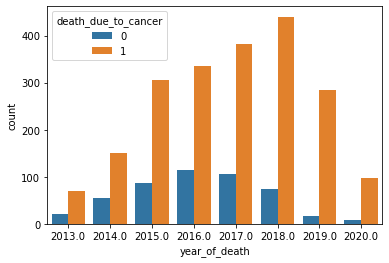

In [32]:
sns.countplot(x='year_of_death',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='year_of_death', ylabel='count'>

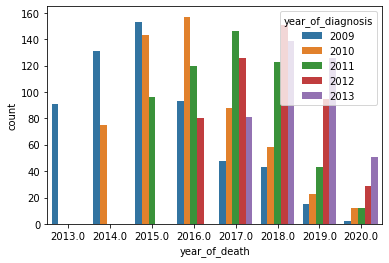

In [33]:
sns.countplot(x='year_of_death',data=train,hue="year_of_diagnosis")

In [34]:
#here i am creting a new feature which is duration of diagnosis 
#duration_of_diagnosis=year_of_death-year_of_diagnosis 
#for missing values in year of death we first fill it by null then we use mean to fill them

train["duration_of_diagnosis"]=train["year_of_death"]-train["year_of_diagnosis"]

In [35]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0


In [36]:
train["duration_of_diagnosis"].describe

<bound method NDFrame.describe of 0       6.0
1       4.0
2       5.0
3       5.0
4       6.0
       ... 
2947    6.0
2948    NaN
2949    5.0
2950    7.0
2951    5.0
Name: duration_of_diagnosis, Length: 2952, dtype: float64>

In [37]:
train["duration_of_diagnosis"].isnull().sum()

402

In [38]:
#drop year_of_death,year_of_diagnosis 
train.drop(["year_of_death","year_of_diagnosis"],inplace=True,axis=1)


In [39]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,81403,34,2,2,Dry eye,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,80463,4,7,5,Calm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
2,TCBA-B8-0xb7d,1,Female,70-74,White,80103,20,1,4,Allergies,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,TCBA-B8-0xfa7,104,Female,65-69,White,80463,20,5,3,Gabapentin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
4,TCBA-B8-0xdc,21,Male,50-54,White,80463,20,5,2,Obsessive-compulsive disorder,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0


In [40]:
train["duration_of_diagnosis"].describe()

count    2550.000000
mean        5.863922
std         1.350614
min         4.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        11.000000
Name: duration_of_diagnosis, dtype: float64

In [41]:
train["duration_of_diagnosis"].unique()

array([ 6.,  4.,  5.,  7.,  8., 10., nan,  9., 11.])

<AxesSubplot:xlabel='duration_of_diagnosis', ylabel='count'>

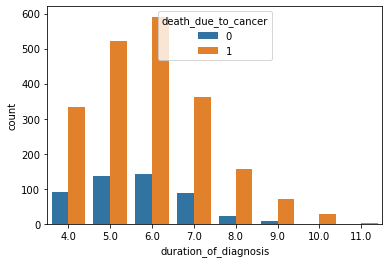

In [42]:
sns.countplot(x='duration_of_diagnosis',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='race', ylabel='count'>

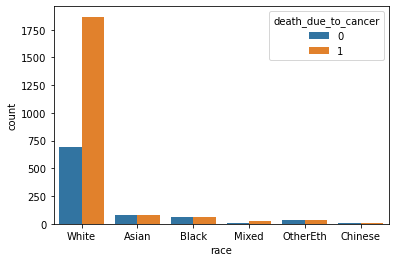

In [43]:
sns.countplot(x='race',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='duration_of_diagnosis', ylabel='count'>

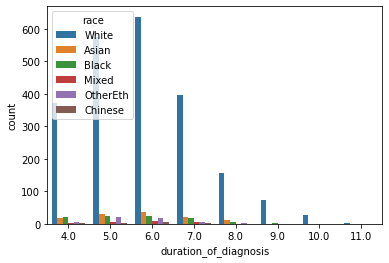

In [44]:
sns.countplot(x='duration_of_diagnosis',data=train,hue="race")

In [45]:
train["duration_of_diagnosis"].fillna(4,inplace=True)

In [46]:
#same for the test
test["duration_of_diagnosis"]=test["year_of_death"]-test["year_of_diagnosis"]
test["duration_of_diagnosis"].fillna(4,inplace=True)

In [47]:
test.shape

(1969, 70)

In [48]:
for i in range(1,67,1):
    test["symptom"+str(i)].fillna(np.mean(test["symptom"+str(i)]))

KeyError: 'symptom41'

In [49]:
columns=test.columns
for clm in columns:
    print("null values in "+clm+" : ",test[clm].isnull().sum())
#only year of death has missing values


null values in patient_id :  0
null values in tumor_cell_count :  0
null values in gender :  0
null values in age_group :  0
null values in race :  0
null values in year_of_diagnosis :  0
null values in morphology_code :  0
null values in year_of_death :  282
null values in smoke_units :  0
null values in area_code :  0
null values in alcohol_consume_units :  0
null values in symptoms :  0
null values in symptom1 :  1
null values in symptom2 :  1
null values in symptom3 :  1
null values in symptom4 :  1
null values in symptom5 :  1
null values in symptom6 :  1
null values in symptom7 :  1
null values in symptom8 :  1
null values in symptom9 :  1
null values in symptom10 :  1
null values in symptom11 :  1
null values in symptom12 :  1
null values in symptom13 :  1
null values in symptom14 :  1
null values in symptom15 :  1
null values in symptom16 :  1
null values in symptom17 :  1
null values in symptom18 :  1
null values in symptom19 :  1
null values in symptom20 :  1
null values in s

In [50]:
#test.dropna(inplace=True)#only 1 value is missing from other feature so we simly can drop that

#### convert all feature to numerical form 

In [51]:
train.head(2)

,patient_id,tumor_cell_count,gender,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,81403,34,2,2,Dry eye,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,80463,4,7,5,Calm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0


In [52]:
train['patient_id'].unique().size
#we dont need id so drop it
train.drop("patient_id",inplace=True,axis=1)
test.drop("patient_id",inplace=True,axis=1)

In [53]:
for i in range(len(train)):
    if train["gender"] is "Male":
        train["male"]=1
        train["female"]=0
    else:
        train["male"]=0
        train["female"]=1
train.drop("gender",inplace=True,axis=1)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-53-f0805ef7b71b>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if train["gender"] is "Male":


In [54]:
for i in range(len(train)):
    if test["gender"] is "Male":
        test["male"]=1
        test["female"]=0
    else:
        test["male"]=0
        test["female"]=1
test.drop("gender",inplace=True,axis=1)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-54-d308e2e7d4a6>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if test["gender"] is "Male":


In [55]:
train["race"].unique()

array(['White', 'Asian', 'Black', 'Mixed', 'OtherEth', 'Chinese'],
      dtype=object)

In [56]:
freq=train["race"].value_counts()


In [57]:
for i in range(len(train)):
    train["race"][i]=freq[train["race"][i]]#max normalization

<ipython-input-57-a70ceaa46946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["race"][i]=freq[train["race"][i]]#max normalization


In [58]:
test['race'].unique()

array(['White', 'Black', 'Asian', 'Chinese', 'Mixed', 'OtherEth'],
      dtype=object)

In [59]:
freq=test["race"].value_counts()
freq#remove 1493 category from race 


White       1718
Asian         86
Black         66
OtherEth      65
Chinese       17
Mixed         17
Name: race, dtype: int64

In [60]:
test["Race"]=0
for i in range(len(test)):
    try:
        test["Race"][i]=freq[test["race"][i]]#max normalization
    except:
        print()
        test["Race"][i]=0

<ipython-input-60-24f23409504d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Race"][i]=freq[test["race"][i]]#max normalization


In [61]:
test["Race"].unique()

array([1718,   66,   86,   17,   65], dtype=int64)

In [62]:
test.drop('race',inplace=True,axis=1)

In [63]:
test.rename(columns={'Race':'race'},inplace=True)

In [64]:
train.head(2)

,tumor_cell_count,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,...,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis,male,female
0,7,60-64,2559,81403,34,2,2,Dry eye,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,0,1
1,1,85-89,2559,80463,4,7,5,Calm,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0,1


In [65]:
#categorical-->age_group,gender,race,symptom#
#one hot encoding for age group

In [66]:
train['age_group'].unique()

array(['60-64', '85-89', '70-74', '65-69', '50-54', '75-79', '80-84',
       '55-59', '90+', '40-44', '45-49', '00-39'], dtype=object)

In [67]:
train.drop('symptoms',inplace=True,axis=1)
test.drop('symptoms',inplace=True,axis=1)

In [68]:
young=['00-39','45-49','40-44']
mid=['60-64', '70-74', '65-69', '50-54','55-59']
old=['75-79', '80-84','90+','85-89']
train['young']=0
train['mid']=0
train['old']=0
for i in range(len(train)):
    if train['age_group'][i] in young:
        train['young'][i]=1
        train['mid'][i]=0
        train['old'][i]=0
    if train['age_group'][i] in mid:
        train['young'][i]=0
        train['mid'][i]=1
        train['old'][i]=0
    if train['age_group'][i] in old:
        train['young'][i]=0
        train['mid'][i]=0
        train['old'][i]=1   
train.drop('age_group',inplace=True,axis=1)        

<ipython-input-68-f2dce77905f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['young'][i]=0
<ipython-input-68-f2dce77905f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mid'][i]=1
<ipython-input-68-f2dce77905f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['old'][i]=0
<ipython-input-68-f2dce77905f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [69]:
young=['00-39','45-49','40-44']
mid=['60-64', '70-74', '65-69', '50-54','55-59']
old=['75-79', '80-84','90+','85-89']
test['young']=0
test['mid']=0
test['old']=0
for i in range(len(test)):
    try:
        if test['age_group'][i] in young:
            test['young'][i]=1
            test['mid'][i]=0
            test['old'][i]=0
        if test['age_group'][i] in mid:
            test['young'][i]=0
            test['mid'][i]=1
            test['old'][i]=0
        if test['age_group'][i] in old:
            test['young'][i]=0
            test['mid'][i]=0
            test['old'][i]=1   
    except:
            test['young'][i]=0
            test['mid'][i]=0
            test['old'][i]=1 
        
test.drop('age_group',inplace=True,axis=1)        

<ipython-input-69-f5f0597e8f70>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['young'][i]=0
<ipython-input-69-f5f0597e8f70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mid'][i]=0
<ipython-input-69-f5f0597e8f70>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['old'][i]=1
<ipython-input-69-f5f0597e8f70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [70]:
train.shape

(2952, 70)

In [71]:
test.drop('year_of_diagnosis',inplace=True,axis=1)
test.drop('year_of_death',inplace=True,axis=1)
test.shape

(1969, 69)

In [72]:
train.columns

Index(['tumor_cell_count', 'race', 'morphology_code', 'smoke_units',
       'area_code', 'alcohol_consume_units', 'symptom1', 'symptom2',
       'symptom3', 'symptom4', 'symptom5', 'symptom6', 'symptom7', 'symptom8',
       'symptom9', 'symptom10', 'symptom11', 'symptom12', 'symptom13',
       'symptom14', 'symptom15', 'symptom16', 'symptom17', 'symptom18',
       'symptom19', 'symptom20', 'symptom21', 'symptom22', 'symptom23',
       'symptom24', 'symptom25', 'symptom26', 'symptom27', 'symptom28',
       'symptom29', 'symptom30', 'symptom31', 'symptom32', 'symptom33',
       'symptom34', 'symptom35', 'symptom36', 'symptom37', 'symptom38',
       'symptom39', 'symptom40', 'symptom50', 'symptom51', 'symptom52',
       'symptom53', 'symptom54', 'symptom55', 'symptom56', 'symptom57',
       'symptom58', 'symptom59', 'symptom60', 'symptom61', 'symptom62',
       'symptom63', 'symptom64', 'symptom65', 'symptom66',
       'death_due_to_cancer', 'duration_of_diagnosis', 'male', 'female',
    

In [78]:
for i in test.columns:
    test[i].fillna(np.mean(test[i]),inplace=True)

In [79]:
for i in test.columns:
    print(i+" null values",test[i].isnull().sum())

tumor_cell_count null values 0
morphology_code null values 0
smoke_units null values 0
area_code null values 0
alcohol_consume_units null values 0
symptom1 null values 0
symptom2 null values 0
symptom3 null values 0
symptom4 null values 0
symptom5 null values 0
symptom6 null values 0
symptom7 null values 0
symptom8 null values 0
symptom9 null values 0
symptom10 null values 0
symptom11 null values 0
symptom12 null values 0
symptom13 null values 0
symptom14 null values 0
symptom15 null values 0
symptom16 null values 0
symptom17 null values 0
symptom18 null values 0
symptom19 null values 0
symptom20 null values 0
symptom21 null values 0
symptom22 null values 0
symptom23 null values 0
symptom24 null values 0
symptom25 null values 0
symptom26 null values 0
symptom27 null values 0
symptom28 null values 0
symptom29 null values 0
symptom30 null values 0
symptom31 null values 0
symptom32 null values 0
symptom33 null values 0
symptom34 null values 0
symptom35 null values 0
symptom36 null values 

In [80]:
test.shape

(1969, 69)

In [81]:
from sklearn.preprocessing import MinMaxScaler
normalization=MinMaxScaler()
test=normalization.fit_transform(test)

In [82]:
test=pd.DataFrame(test)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,0.000000,0.735294,0.333333,0.500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.220653,0.352941,0.777778,0.375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.428571,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.061783,0.088235,0.444444,0.750,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.008826,0.588235,0.444444,0.000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142857,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.000000,0.735294,0.111111,1.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0


In [83]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,...,1969.000000,1969.000000,1969.000000,1969.000000,1969.0,1969.0,1969.000000,1969.000000,1969.000000,1969.000000
mean,0.016129,0.077687,0.435052,0.480729,0.411884,0.135163,0.022866,0.022358,0.150407,0.041667,...,0.028455,0.027947,0.020833,0.223028,0.0,0.0,0.876193,0.052819,0.466227,0.480955
std,0.056116,0.114252,0.233283,0.272960,0.299998,0.341897,0.149476,0.147844,0.357469,0.199826,...,0.166270,0.164821,0.142826,0.204096,0.0,0.0,0.324020,0.223728,0.498985,0.499764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.008826,0.294118,0.222222,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.040600,0.441176,0.444444,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.0,0.0,1.000000,0.000000,0.000000,0.000000
75%,0.004854,0.123566,0.588235,0.777778,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.285714,0.0,0.0,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### modeling

In [84]:
#split the data in x and y

x= train.drop('death_due_to_cancer', axis=1).values
y= train['death_due_to_cancer'].values
from sklearn.preprocessing import MinMaxScaler
normalization= MinMaxScaler()
x= normalization.fit_transform(x)

In [85]:
#split the data in x and y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.4, random_state=50,shuffle=True)
x_valid, x_test, y_valid, y_test =train_test_split(x_test, y_test, test_size=0.5, random_state=50,shuffle=True)

In [86]:
# import Library for modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import f1_score

In [87]:
# 1. KNN 

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred1 = knn.predict(x_valid)

print(f"KNeighborsClassifier F1 Score: {f1_score(y_valid, y_pred1, average='micro')}")

KNeighborsClassifier F1 Score: 0.6644067796610169


In [88]:
# 2. Support Vector Machine

svc = SVC(probability=True)

svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_valid)

print(f"Support Vector Machine F1 Score: {f1_score(y_valid, y_pred2, average='micro')}")

Support Vector Machine F1 Score: 0.7


In [89]:
# 3. LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred3 = lr.predict(x_valid)

print(f"Logistic Regression F1 Score: {f1_score(y_valid, y_pred3, average='micro')}")

Logistic Regression F1 Score: 0.7101694915254236


In [90]:
# 4. Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred4 = rf.predict(x_valid)

print(f"RandomForest F1 Score: {f1_score(y_valid, y_pred4, average='micro')}")

RandomForest F1 Score: 0.7457627118644068


In [91]:
#final model
x_test=test.values
x_test.shape

(1969, 69)

In [ ]:
x_test

In [95]:
# . Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

sample_submission=pd.read_csv("sample_submission.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.DataFrame(test['patient_id'])

sample_submission['death_due_to_cancer']=y_pred
sample_submission.shape

(1969, 2)

In [112]:
sample_submission['death_due_to_cancer'].count()

1969

In [114]:
sample_submission.to_csv("sample_submission_.csv")